In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# import seaborn as sns
# sns.set(0)
import numpy.random as rnd
%matplotlib inline

In [4]:
edges = np.loadtxt("fb_Princeton.txt", skiprows=4, dtype="i8,i8")
G = nx.Graph()
G.add_edges_from(edges)

In [135]:
k = nx.degree(G)
e = nx.edges(G)

common information about Graph:
number of vertices and edges; number of conntected components:

In [145]:
degrees = np.array(list(k.values()))
len(degrees), len(e), nx.number_connected_components(G)

(628, 88.938750758035169, 6596, 293320, 10)

Distribution of degrees:

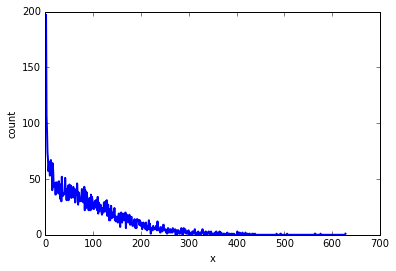

In [147]:
yh, binEdges=np.histogram(degrees, bins=627)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters, yh, '-', lw=2)
plt.ylabel('count')
plt.xlabel('x')

Degree distribution in loglog-scale

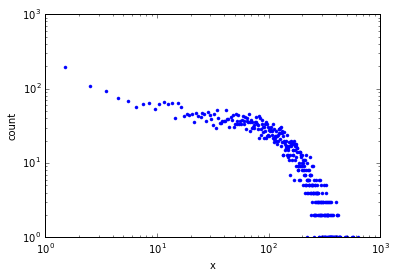

In [148]:
plt.loglog(bincenters, yh, '.', lw=2)
plt.ylabel('count')
plt.xlabel('x')

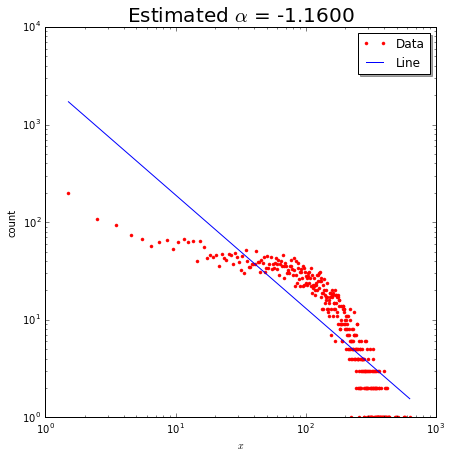

In [151]:
idx = np.ix_(yh != 0)
x_est = np.log(bincenters[idx])
y_est = np.log(yh[idx])
s = len(x_est)

# Do estimation
X = np.vstack([np.ones(s), x_est]).T
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

# Plot
idx = np.argsort(x_est)
yt = np.exp(X[idx,:].dot(Beta))
xt = np.exp(X[idx,1])

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.loglog(bincenters, yh, '.r', label='Data') 
ax.loglog(xt, yt, 'b', label='Line')
plt.ylabel('count')
plt.xlabel('$x$')
ax.legend(loc='upper right', shadow=True)
plt.title('Estimated $\\alpha$ = {0:1.4f}'.format(Beta[1]), fontsize=20)

$b$ and $k$ coefficients of linear regression ($k*x + b$)

In [152]:
Beta

array([ 7.91502254, -1.16003974])

Linear regression of x looks like $log(x)=-\alpha log(x) + log(C)$, so:

C = np.exp(Beta[0])
alpha = -Beta[1]

$x_{min}=(\frac{C}{\alpha - 1})^{\frac1{\alpha-1}}$, so:

In [158]:
xmin = (C / (alpha - 1)) ** (1 / (alpha - 1))
xmin = np.log(xmin)
xmin

60.905843461230866

Anyway, we are able to find max and average number of in- and out- edges. Graph is undirected, so parameters for in- and out- edges is equal.

In [156]:
max(degrees), np.mean(degrees)

(628, 88.938750758035169)

We know $x_min$, so it is easy to find $\alpha$ by formula $\alpha = 1 + n[\sum_{i=1}^n ln(\frac{x_i}{x_{min}})]^{-1}$

In [167]:
sum_degree = sum([np.log(xi/xmin) if xi > xmin else 0 for xi in degrees])
alpha = 1 + len(degrees) * sum_degree ** (-1)
alpha

3.4845317568436918

In [168]:
for xmin in range(1, max(degrees)):
    sum_degree = sum([np.log(xi/xmin) if xi > xmin else 0 for xi in degrees])
    alpha = 1 + len(degrees) * sum_degree ** (-1)
    C = (alpha - 1) * (xmin ** (alpha - 1))
    max_diff = 0
    for x in range(1, max(degrees)):
        

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
